## Research Question

#### Do different mallet types create different sound qualities when used to play a marimba?

In [436]:
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import IPython.display as ipd
import pandas as pd

In [437]:
import librosa.display

## Turn the files into numpy arrays

This first thing we do is take the files that we want to analize and turn them into numpy arrays.  Librosa has a function librosa.load which does this for us.  Not only does it give is the sound wave as a numpy array it also gives us the sampling rate which by default is 22050.  Our files were created with a sample rate of 44100.  We are going to load the files with the 44100 sample rate rather than the librosa default.

In [438]:
yarn_c4, sr = librosa.load('Marimba_yarn_C4.aif', sr=44100)
rubber_c4, _ = librosa.load('Marimba_rubber_C4.aif', sr=44100)
cord_c4, _ = librosa.load('Marimba_cord_C4.aif', sr=44100)
dead_c4, _ = librosa.load('Marimba_deadstroke_C4.aif', sr=44100)

## Next we are going to visualize the waveforms from the different files

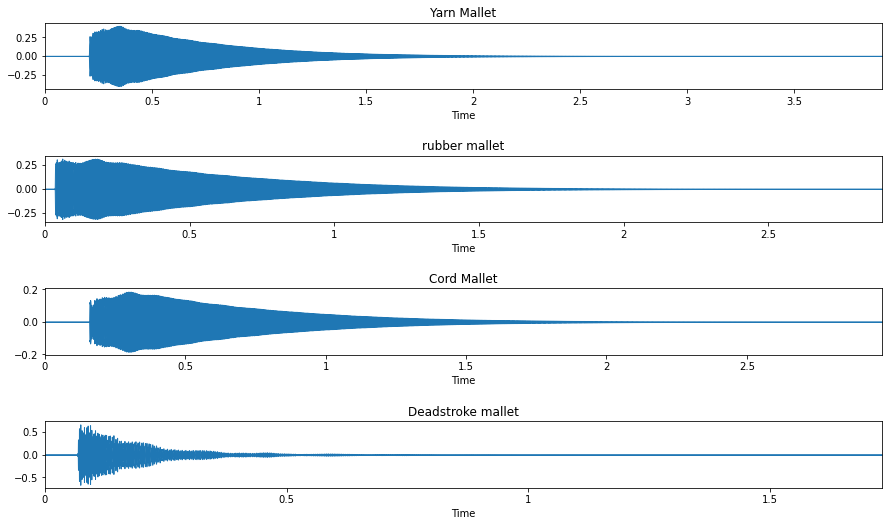

In [439]:
plt.figure(figsize = (15,17))

plt.subplot(4,1,1)
librosa.display.waveplot(yarn_c4)
plt.title('Yarn Mallet')

plt.subplot(4,1,2)
librosa.display.waveplot(rubber_c4)
plt.title('rubber mallet')

plt.subplot(4,1,3)
librosa.display.waveplot(cord_c4)
plt.title('Cord Mallet')

plt.subplot(4,1,4)
librosa.display.waveplot(dead_c4)
plt.title('Deadstroke mallet')

plt.subplots_adjust(bottom=0.5, hspace=1)

If you look at these waveforms you can see that they are all of a different length.  This is going to cause problems when we start playing with this data.  Our next step is to set these arrays so that they are all the same length. We are going to make them the length of the shortest waveform which is the deadstroke.  Here we are doing this by slicing the arrays.  We may also be able to do this same thing using pandas dataframe in later in this notebook.   

In [456]:
yarn_c4 = yarn_c4[:len(dead_c4)]
rubber_c4 = yarn_c4[:len(dead_c4)]
cord_c4 = yarn_c4[:len(dead_c4)]

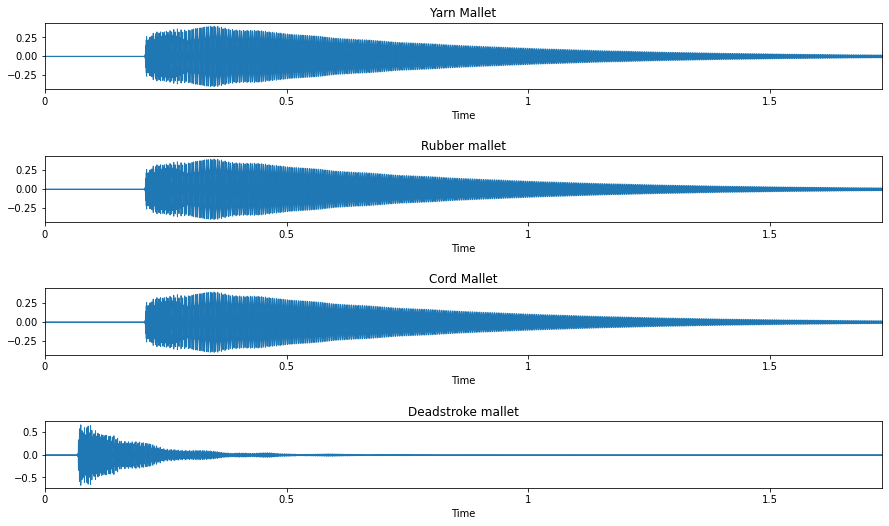

In [337]:
# Visualize the waveforms to verify they are all the smae length
plt.figure(figsize = (15,17))

plt.subplot(4,1,1)
librosa.display.waveplot(yarn_c4)
plt.title('Yarn Mallet')

plt.subplot(4,1,2)
librosa.display.waveplot(rubber_c4)
plt.title('Rubber mallet')

plt.subplot(4,1,3)
librosa.display.waveplot(cord_c4)
plt.title('Cord Mallet')

plt.subplot(4,1,4)
librosa.display.waveplot(dead_c4)
plt.title('Deadstroke mallet')

plt.subplots_adjust(bottom=0.5, hspace=1)

By looking at the waveform we can see an obvious differenct in deadstroke waveform however the yarn rubber and cord mallet waveforms all pretty much  look the same.  

This is only looking at the information as it pertains to the time amplitude scale.  We can also look at sound as the amount of power per frequency.  To look at sound in the frequency domain we need to take the fourier transform of the waveform.  This can ealsy be done by using a numpy method fft.fft

Next we move into the frequency domain by taking the fft of the waveform then we plot them out for visualization.  

In [338]:
def plot_magnitude_spectrum(signal, title, sr, f_ratio=1):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)
    
    plt.figure(figsize=(18, 5))
    frequency = np.linspace(0, sr, len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency) * f_ratio)
    plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)
    plt.show()

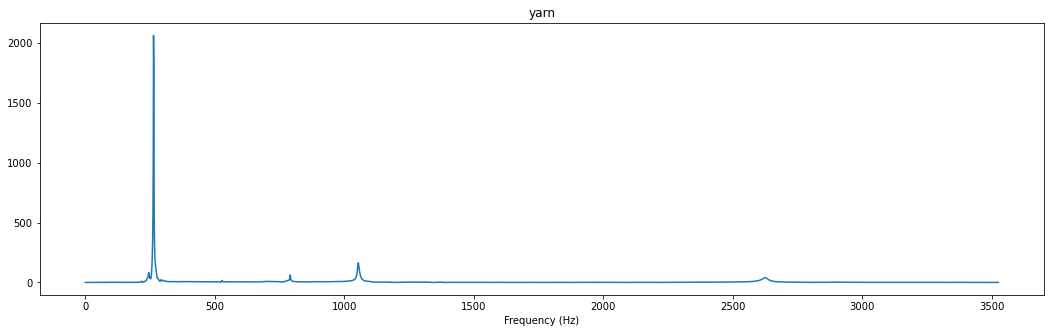

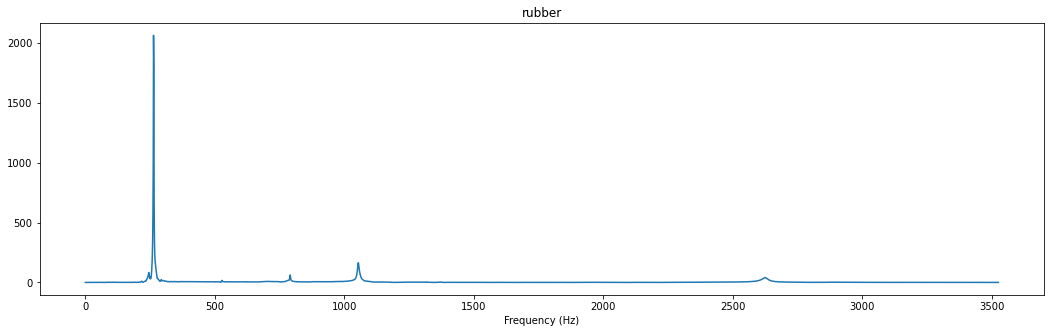

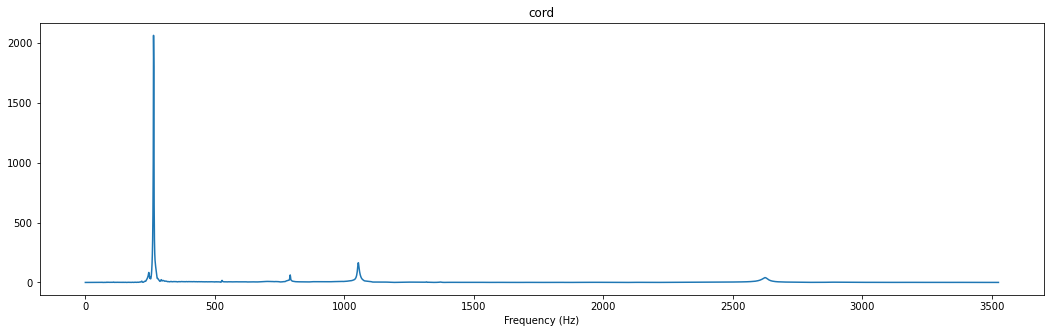

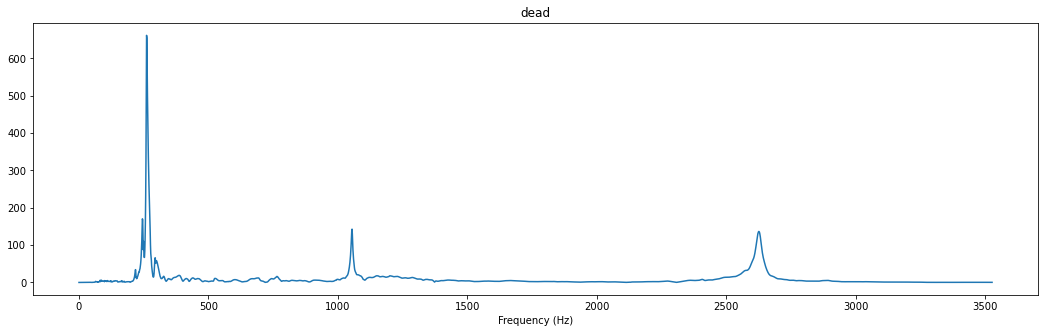

In [341]:
plot_magnitude_spectrum(yarn_c4, 'yarn', sr, 0.08)
plot_magnitude_spectrum(rubber_c4, 'rubber', sr, 0.08)
plot_magnitude_spectrum(cord_c4, 'cord', sr, 0.08)
plot_magnitude_spectrum(dead_c4, 'dead', sr, 0.08)

In [309]:
262 *3

786

In [115]:
262*4

1048

In [347]:
262*10

2620

The above shows the frequency spectrum for middle C or C4 being played on a marimba.  The fundamental fuequency for C4 is 262Hz.  Every multiple of the fundamental frequency is considered a harmonic, and this provides our ear with the timber of the sound or the sound quality.  A Violin playing C4 would have different harmonics as a trumpet and so forth and so on.  

In the examples above we can see that in three of the four samples we see energy at the fundamental, the third harmonic 786Hz and the fourth harmonic 1048Hz, and at the 10th harmonic 2620Hz.  In the deadstroke example we only see energy at the fundamental and the fourth harmonic and the 10th harmonic.  

Using the frequency spectrum we are still seeing a difference from the deadstroke, but not much difference between the yarn, cord and rubber mallets.  

Next we are going to look at these files as a function of time, amplitude and frequency.  To do this we are going to use a heatmap to make a spectragram.

In [348]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [349]:
def plot_spectrogram(Y, sr, hop_length, y_axis='log'):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                            sr=sr,
                            hop_length=hop_length,
                            x_axis='time',
                            y_axis=y_axis)
    plt.colorbar(format='%+2.f')

C:\Users\amand\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\amand\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\amand\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


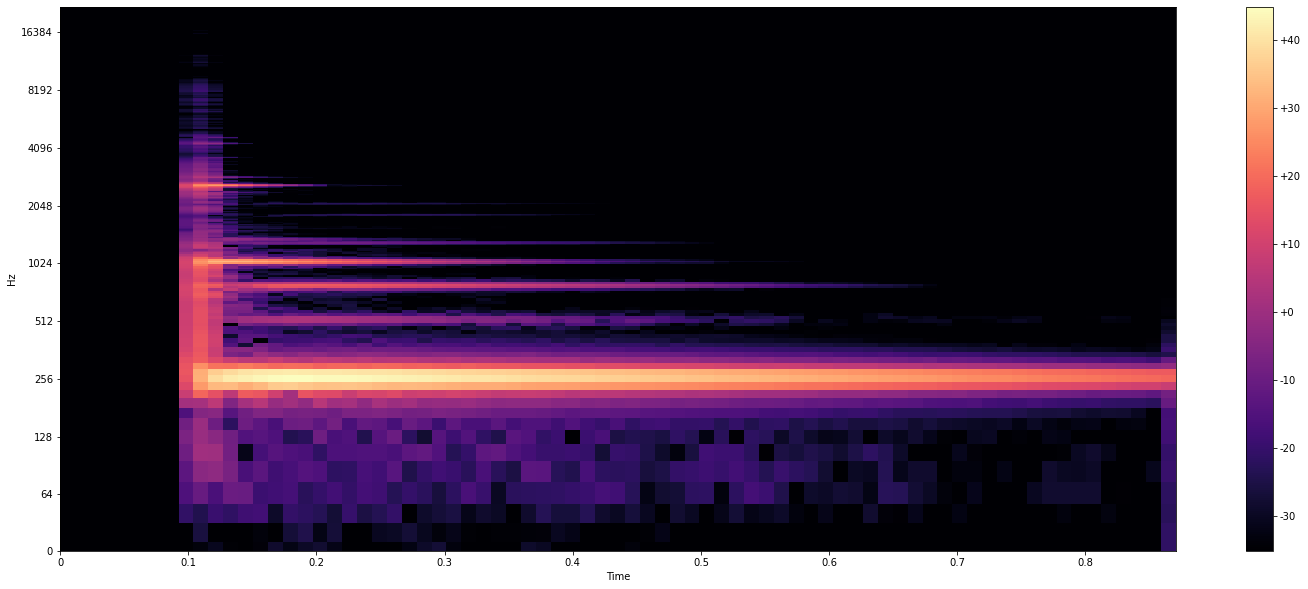

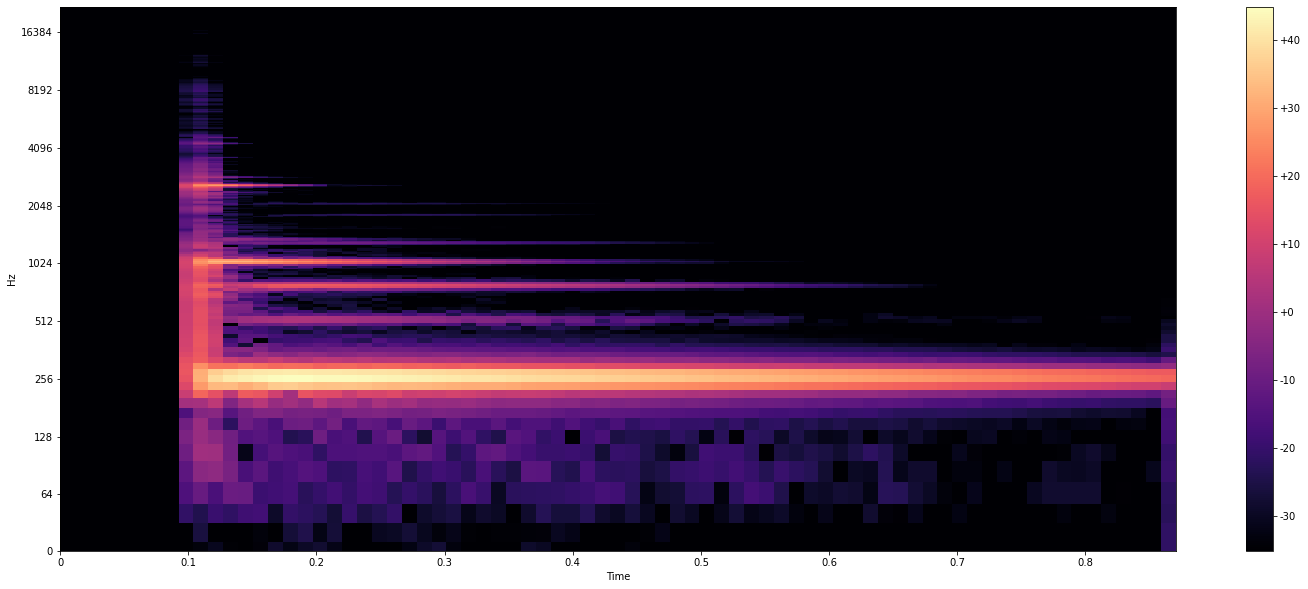

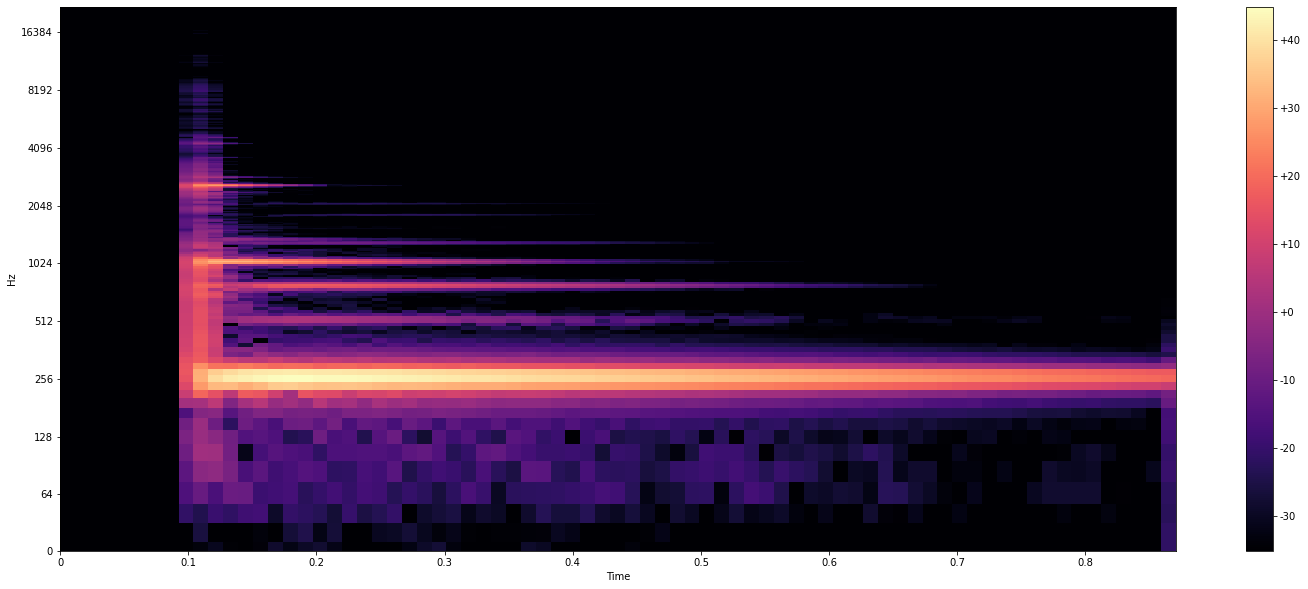

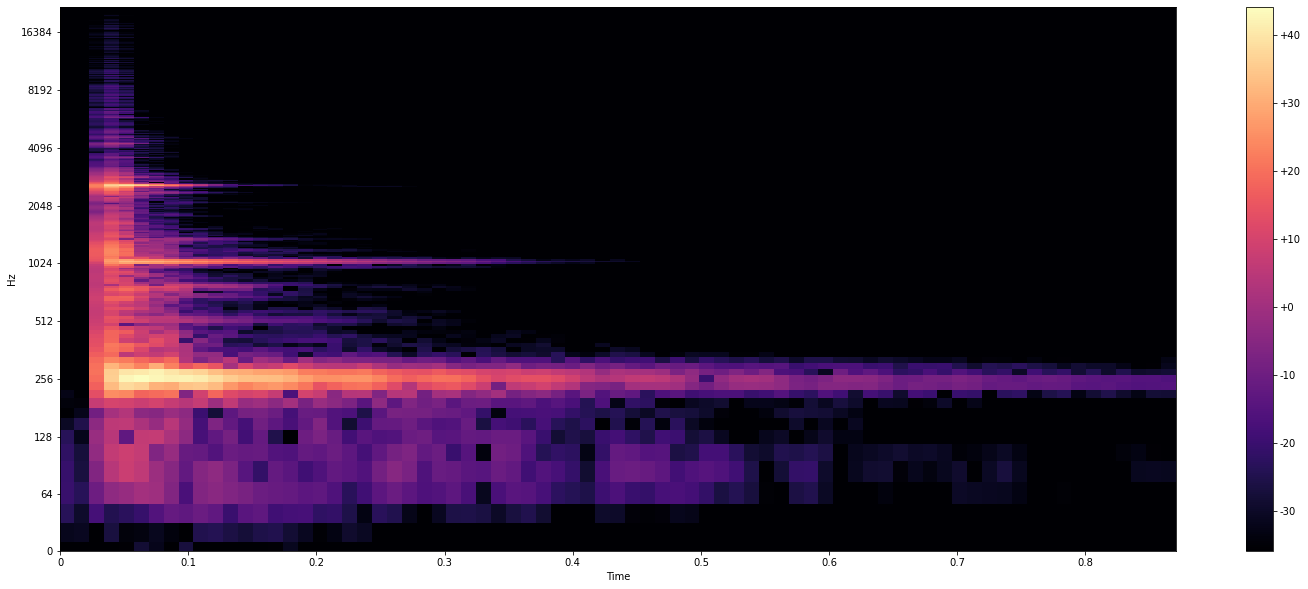

In [350]:
s_yarn = librosa.stft(yarn_c4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
s_rubber = librosa.stft(rubber_c4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
s_cord = librosa.stft(cord_c4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
s_dead = librosa.stft(dead_c4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

y_yarn = librosa.power_to_db(np.abs(s_yarn)**2)
y_rubber = librosa.power_to_db(np.abs(s_rubber)**2)
y_cord = librosa.power_to_db(np.abs(s_cord)**2)
y_dead = librosa.power_to_db(np.abs(s_dead)**2)

plot_spectrogram(y_yarn, sr, HOP_SIZE, y_axis='log')
plot_spectrogram(y_rubber, sr, HOP_SIZE, y_axis='log')
plot_spectrogram(y_cord, sr, HOP_SIZE, y_axis='log')
plot_spectrogram(y_dead, sr, HOP_SIZE, y_axis='log')

We plotted the y axis on a log scale because well, sound works better on a log scale.  

Still there is not too much difference between the yarn, rubber and cord mallets.  Just as we saw earlier the only spectrogram that may look different is the one for the deadstroke.  This is to be expected, when playing a deadstroke you are stopping the bar from resonating and in turn creating a bit of distortion as well.  

Next we are going to apply a filter to our sounds.  Specifically we are going to apply a mel filter.  first lets visualize the filter itself.

In [351]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=40)

In [352]:
filter_banks.shape

(40, 1025)

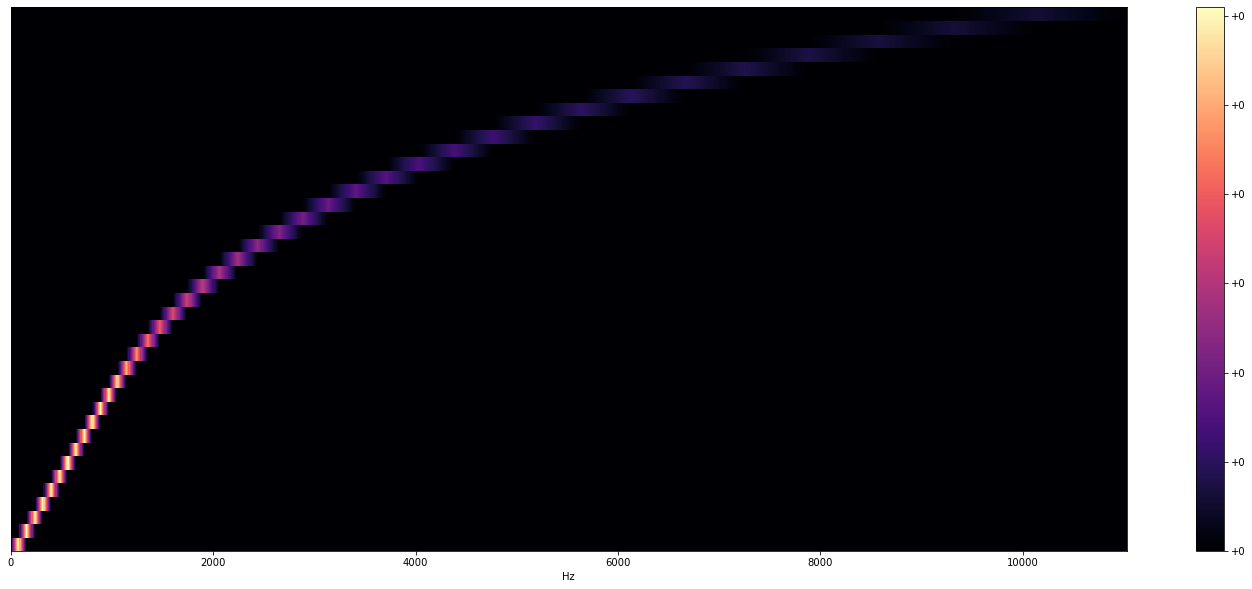

In [322]:
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks, sr=sr, x_axis='linear')
plt.colorbar(format="%+2.f")
plt.show()

Next we are actually going to use a librosa feature (function) called melspectrogram to actually apply the filter to our sounds.  Then we will plot them again for visualization.  

In [374]:
def plot_mel_spectrogram(Y, sr, y_axis='log'):
    plt.figure(figsize=(25, 10))
    mel_spectrogram = librosa.feature.melspectrogram(Y, sr=sr, n_fft=2048, hop_length=512, n_mels=90)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    librosa.display.specshow(log_mel_spectrogram,
                            x_axis='time',
                            y_axis='mel',
                            sr=sr)
    plt.colorbar(format="%+2.f")

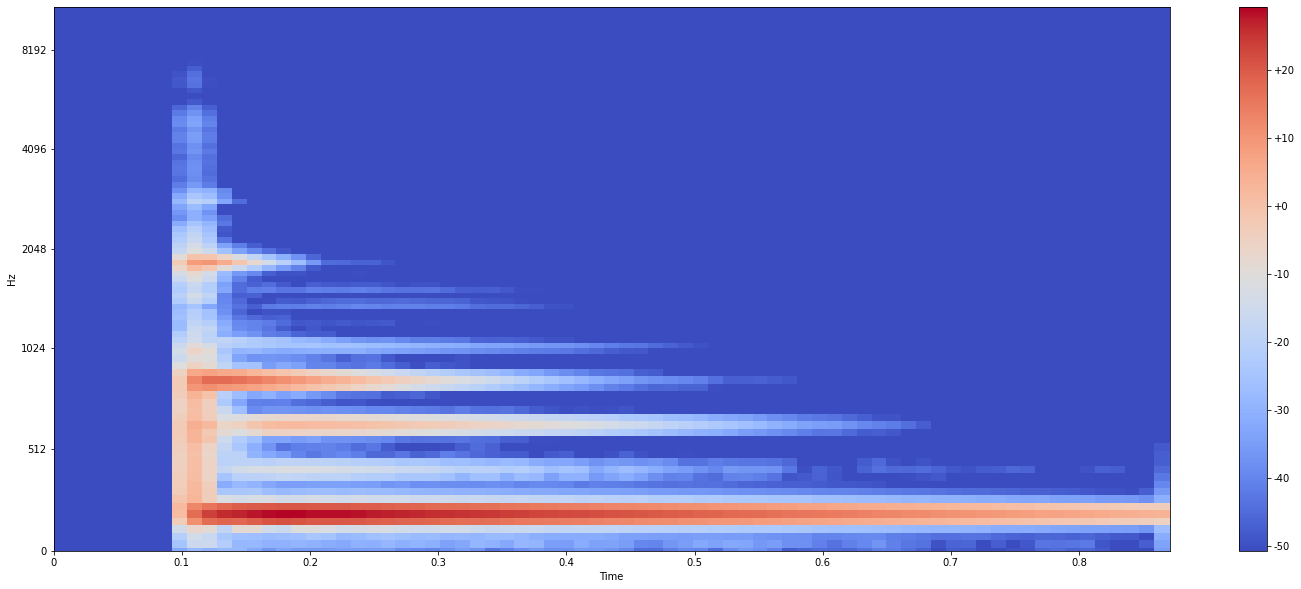

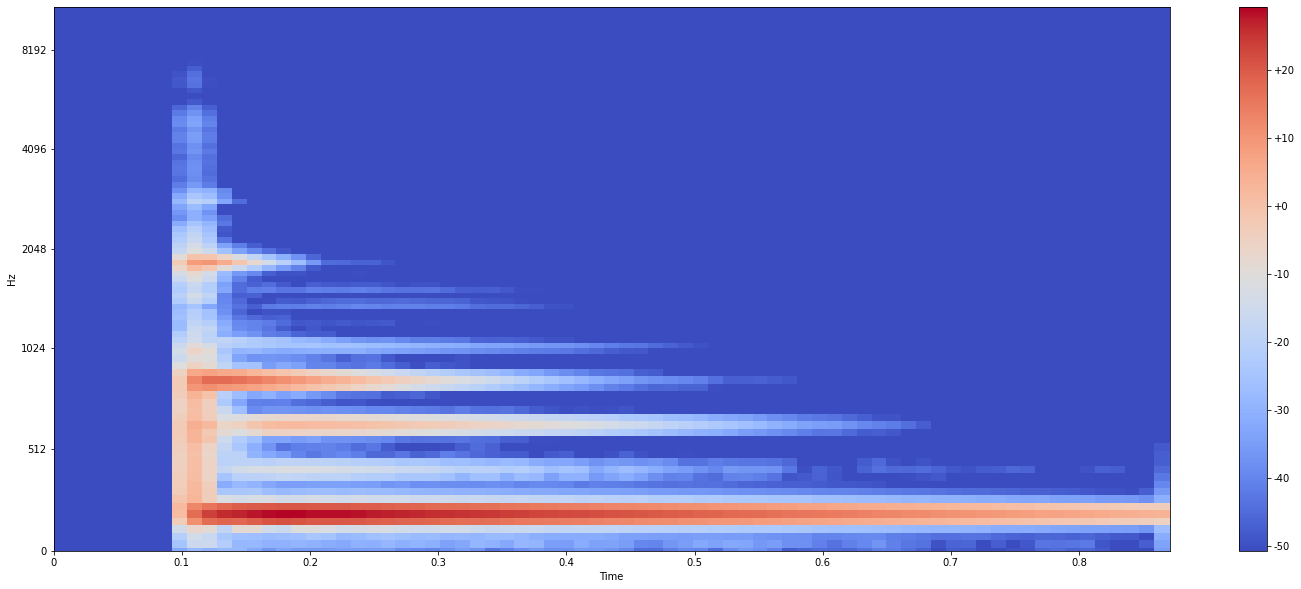

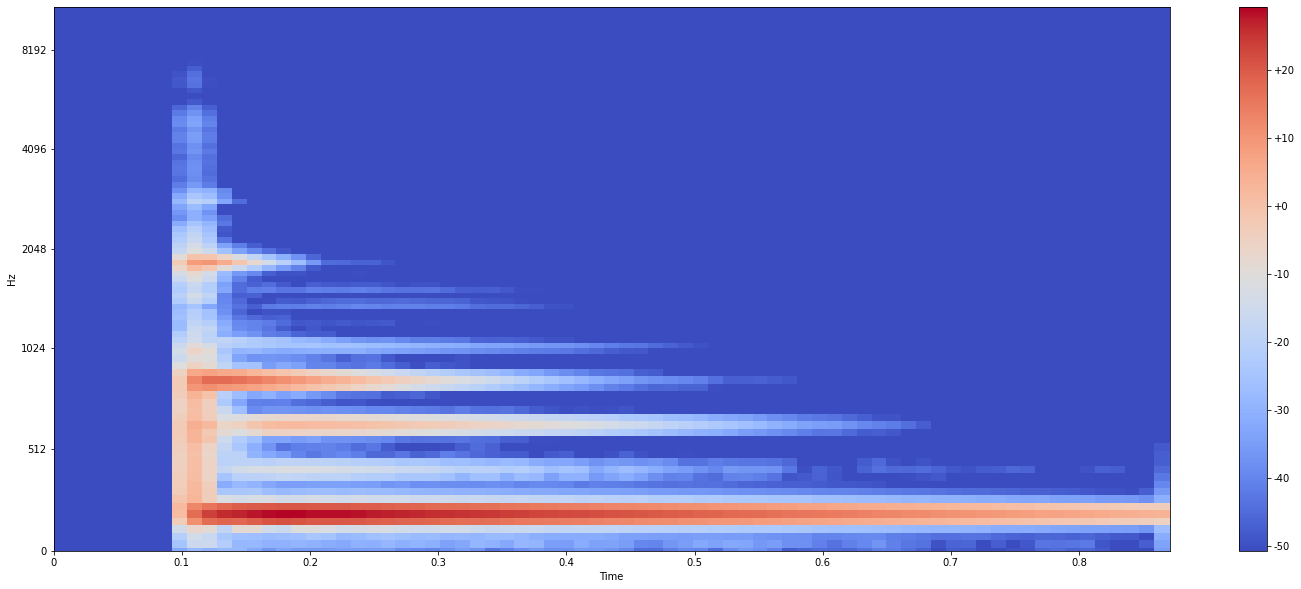

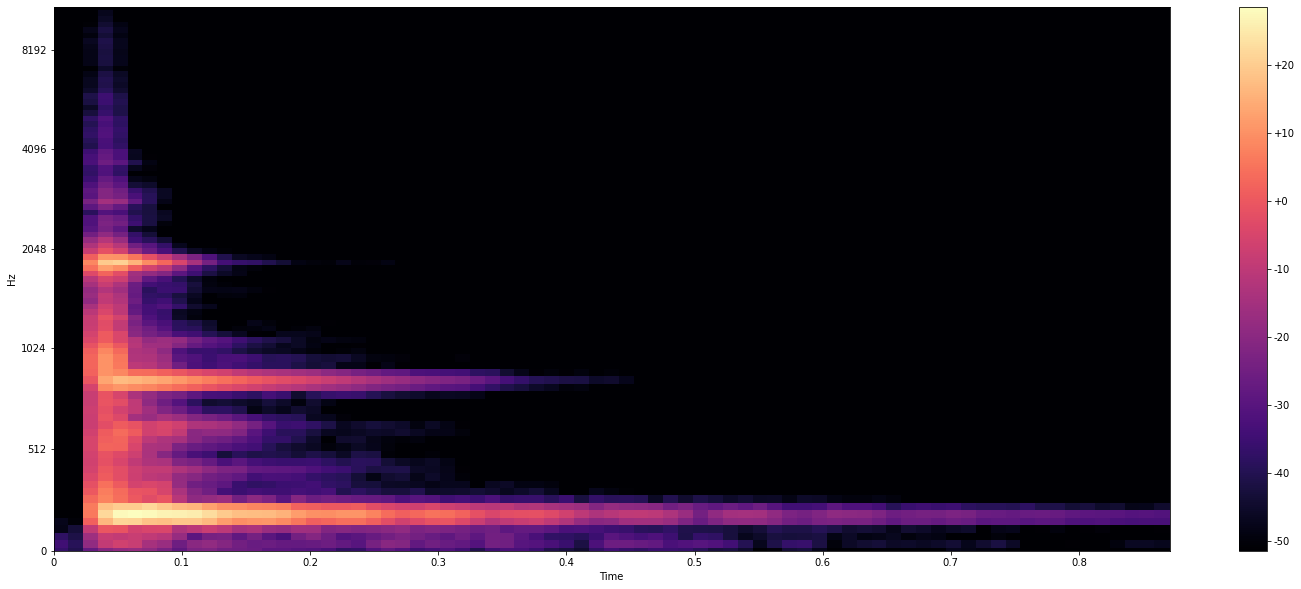

In [375]:
plot_mel_spectrogram(yarn_c4, sr=sr)
plot_mel_spectrogram(rubber_c4, sr=sr)
plot_mel_spectrogram(cord_c4, sr=sr)
plot_mel_spectrogram(dead_c4, sr=sr)

Maybe there is some differences here with the Mel Spectrograms but they all still look fairly similar.  I actually think the Mel Spectrogram even makes the deadstroke look like all the other normal strokes with various mallets.  

Next we are going to extract the MFCC, Mel-Frequency Cepstrail Coeficients.  We are going to pretend that the log_mel_spectrum above is a signal and we are going to take the cosine transorm of that signal.  We are then going to look at the amplitudes of that result.  This will give us the MFCCs

In [391]:
def extract_mfcc(Y, n_mfcc=13, sr=sr):
    mfccs = librosa.feature.mfcc(Y, n_mfcc=n_mfcc, sr=sr)
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(mfccs, x_axis = 'time', sr=sr)
    plt.colorbar(format="%+2.f")

    return mfccs

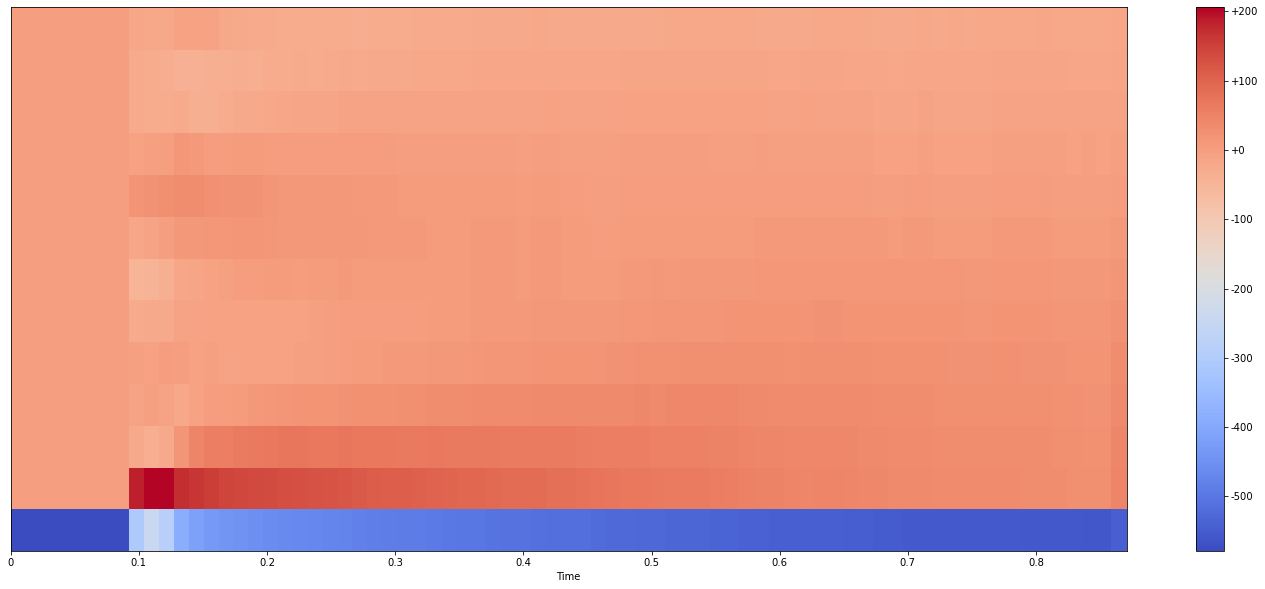

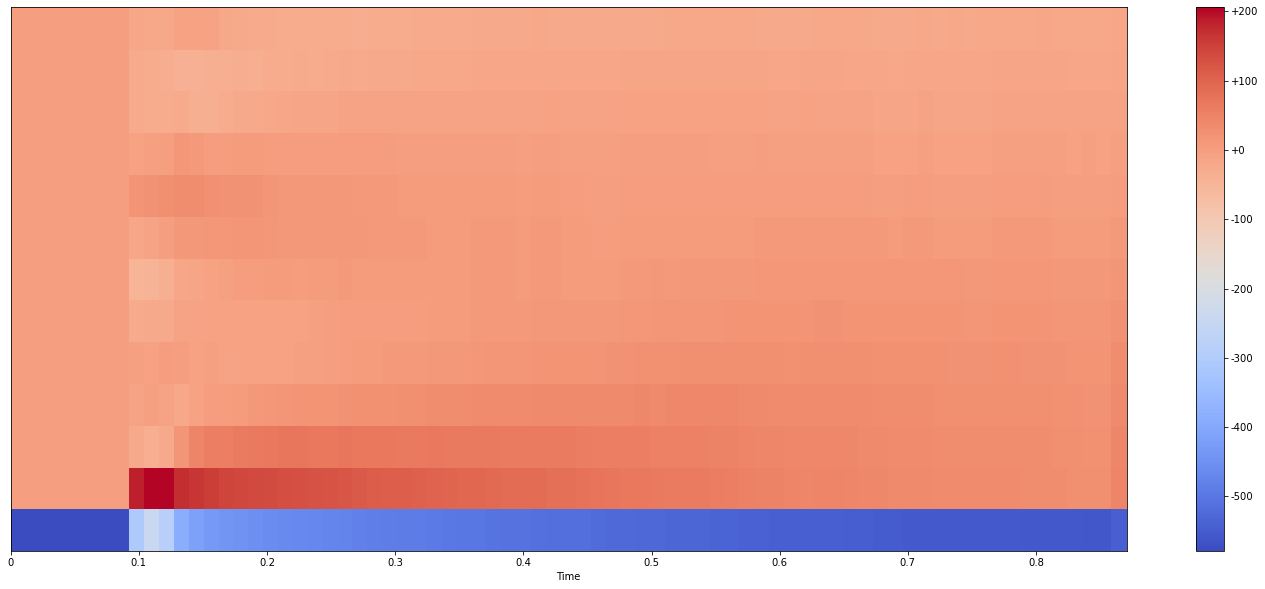

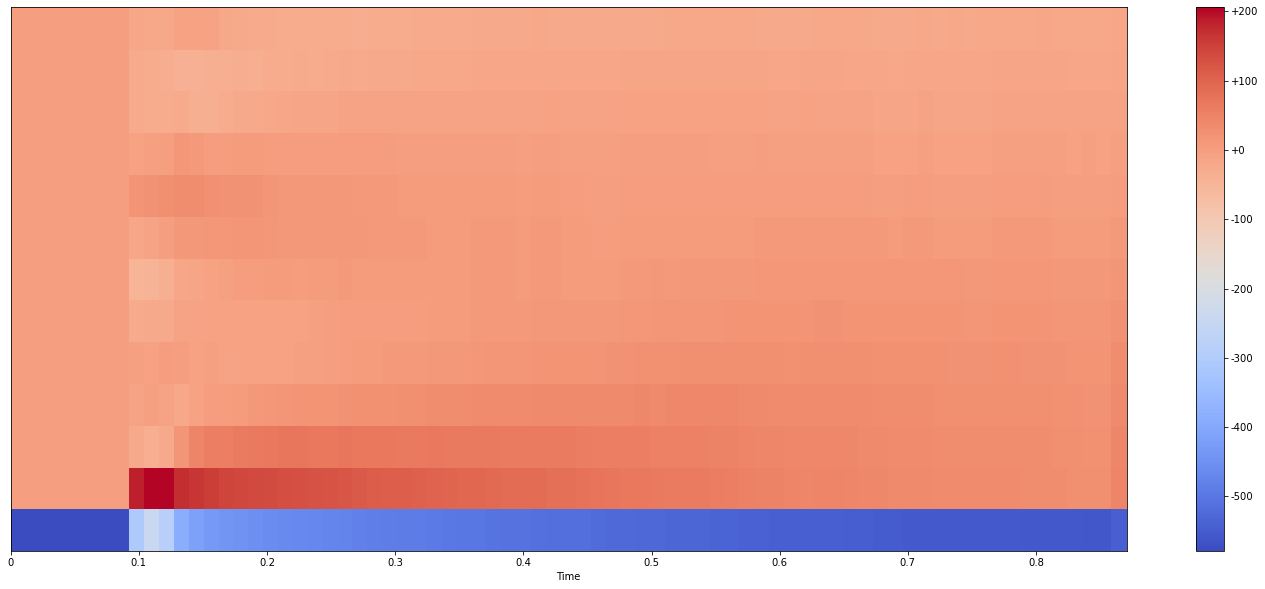

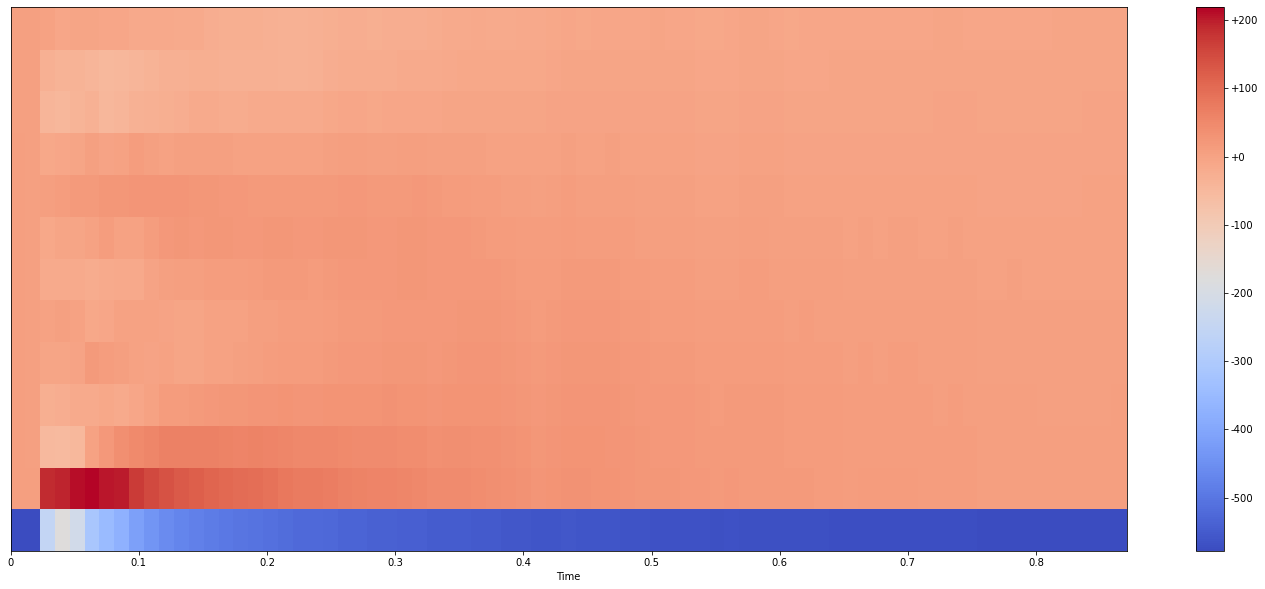

In [392]:
yarn_mfcc = extract_mfcc(yarn_c4)
rubber_mfcc = extract_mfcc(rubber_c4)
cord_mfcc = extract_mfcc(cord_c4)
dead_mfcc = extract_mfcc(dead_c4)

Although MFCCs are used quit often for speech recognition and music identification I really am not seeing much benefit here.  Although this may be able to tell us a normal stroke from a dead stroke I still dont think we have anything that can tell the difference between the different types of mallets.  

Another manipulation we can do is to thake the first and second dirivatives of the MFCCs.  Let's see what that give us.  

In [393]:
def mfcc(Y, n_mfcc=13, sr=sr):
    mfccs = librosa.feature.mfcc(Y, n_mfcc=n_mfcc, sr=sr)
    return mfccs

def delta_mfcc(mfccs):
    delta_mfccs = librosa.feature.delta(mfccs)
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(delta_mfccs, x_axis = 'time', sr=sr)
    plt.colorbar(format="%+2.f")
    
    return delta_mfccs

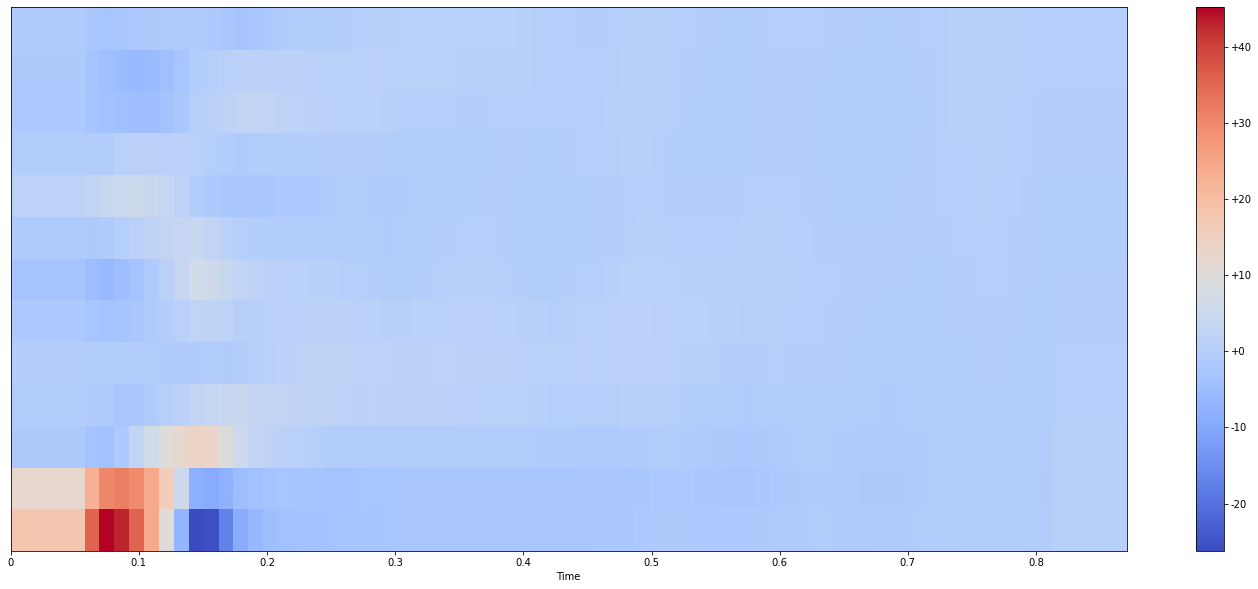

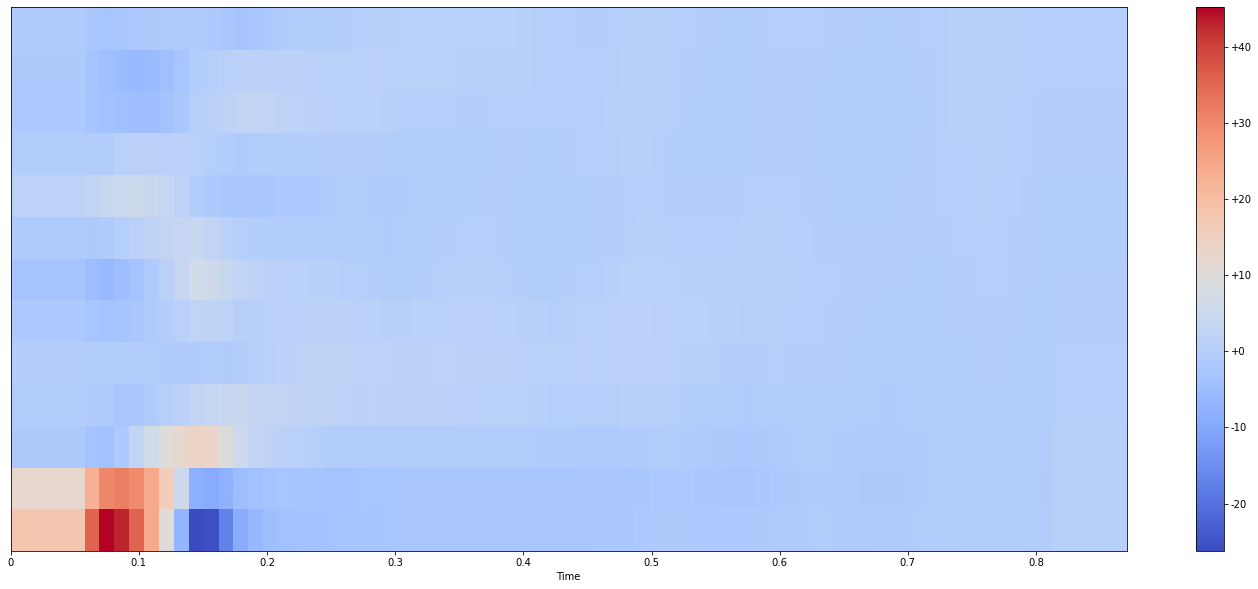

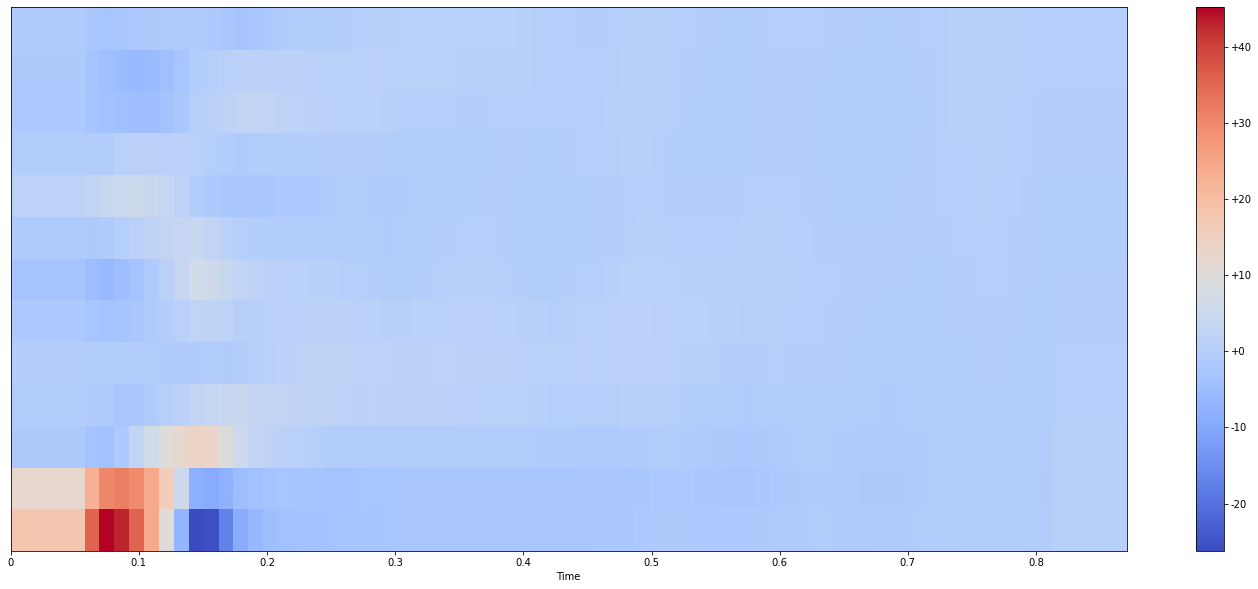

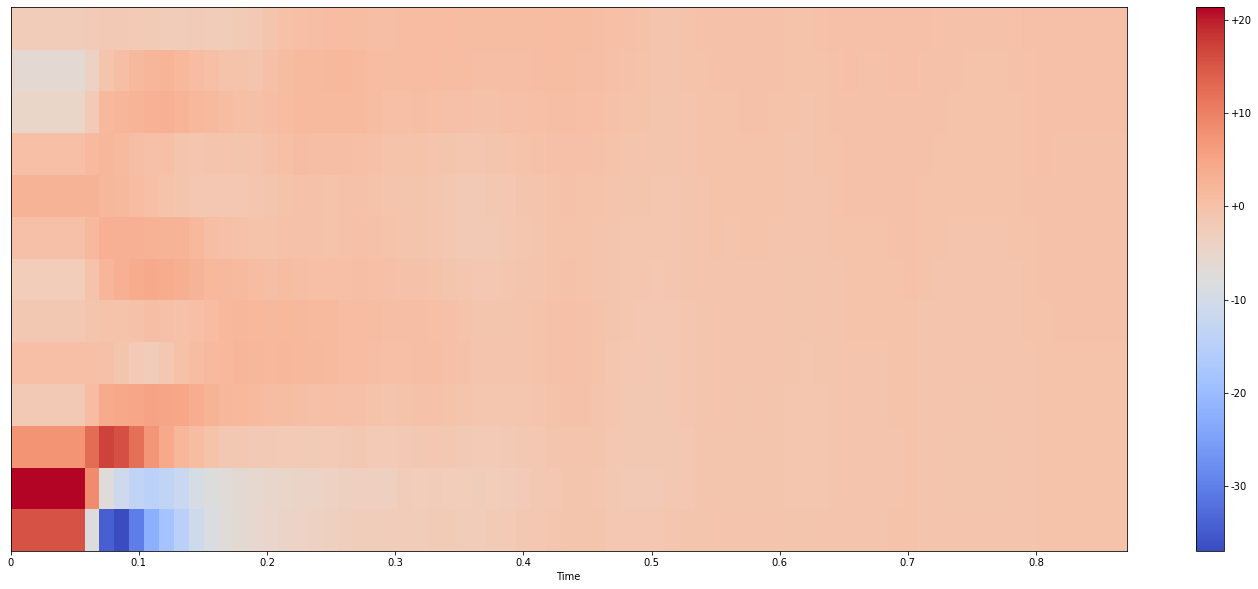

In [394]:
yarn_delta_mfcc = delta_mfcc(mfcc(yarn_c4))
rubber_delta_mfcc = delta_mfcc(mfcc(rubber_c4))
cord_delta_mfcc = delta_mfcc(mfcc(cord_c4))
dead_delta_mfcc = delta_mfcc(mfcc(dead_c4))

Well that doesn't look very promising.  Lets try the second dirivative.  

In [395]:
def delta2_mfcc(mfccs):
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(delta2_mfccs, x_axis = 'time', sr=sr)
    plt.colorbar(format="%+2.f")
    
    return delta2_mfccs

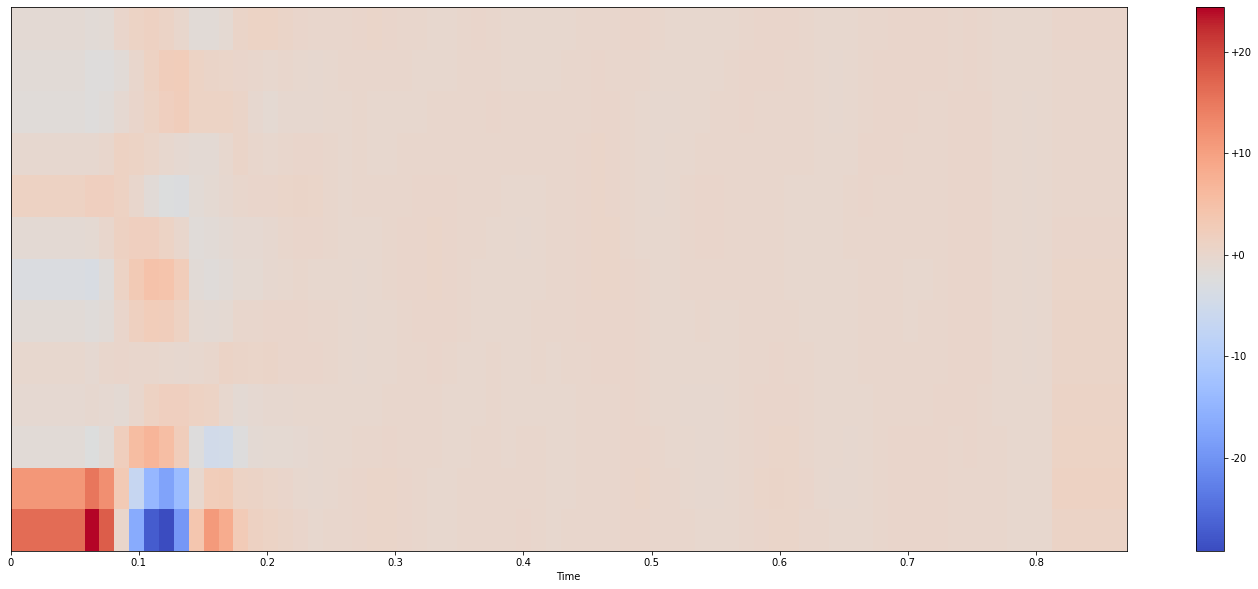

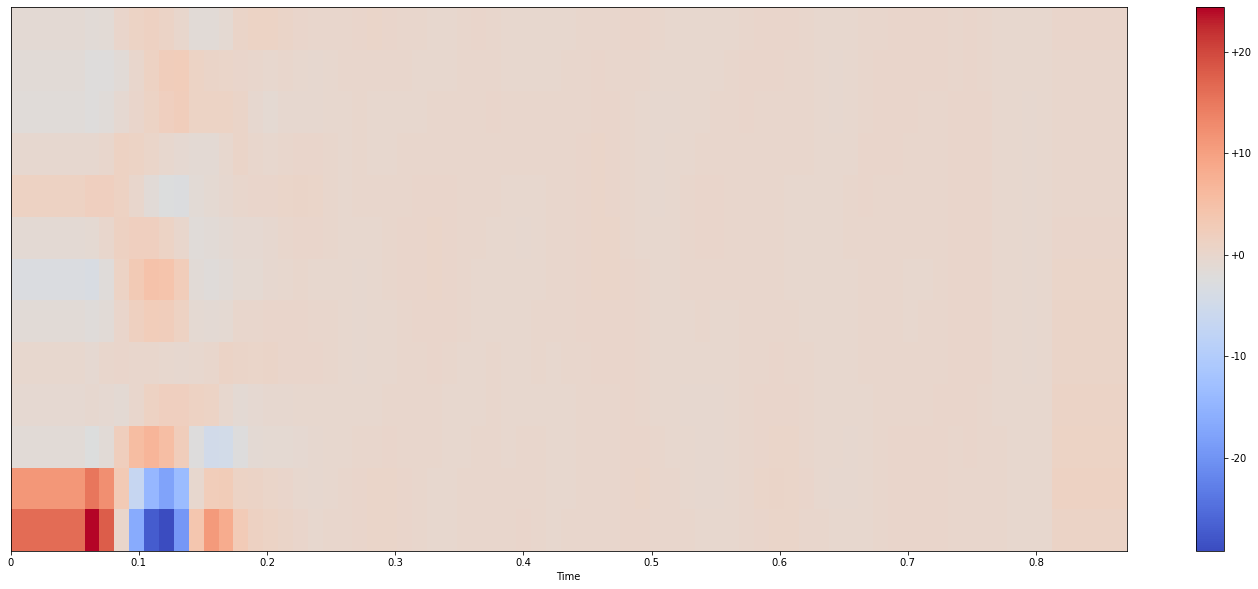

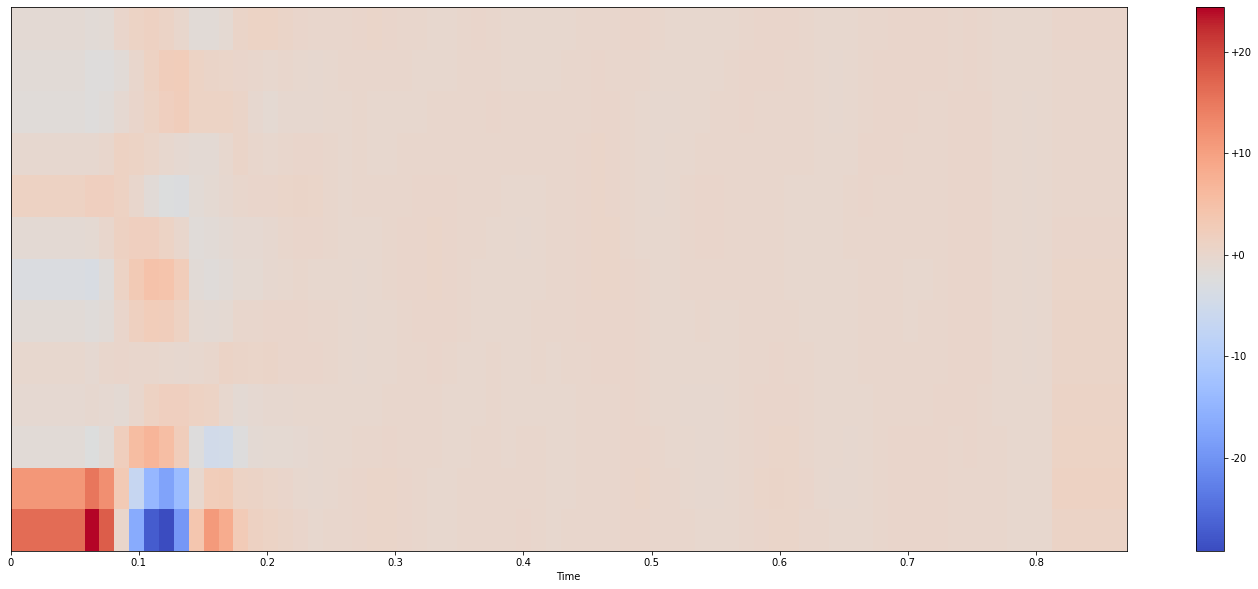

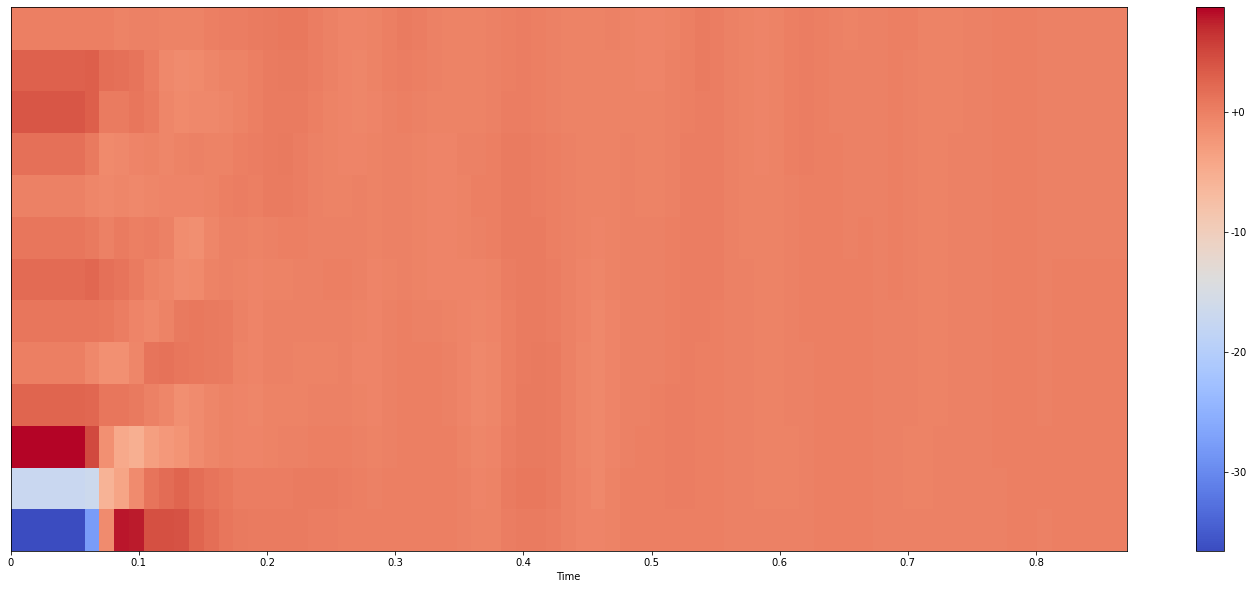

In [396]:
yarn_delta2_mfcc = delta2_mfcc(mfcc(yarn_c4))
rubber_delta2_mfcc = delta2_mfcc(mfcc(rubber_c4))
cord_delta2_mfcc = delta2_mfcc(mfcc(cord_c4))
dead_delta2_mfcc = delta2_mfcc(mfcc(dead_c4))

Still cant see much difference between the different types of mallets.  We really only see a differece with the normal strokes and the dead stroke.  

Let's try concatenating these three things together and see what happens.

In [397]:
def comprehensive_mfcc(mfccs, delta_mfccs, delta2_mfccs):
    comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
    
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(comprehensive_mfccs, x_axis = 'time', sr=sr)
    plt.colorbar(format="%+2.f")

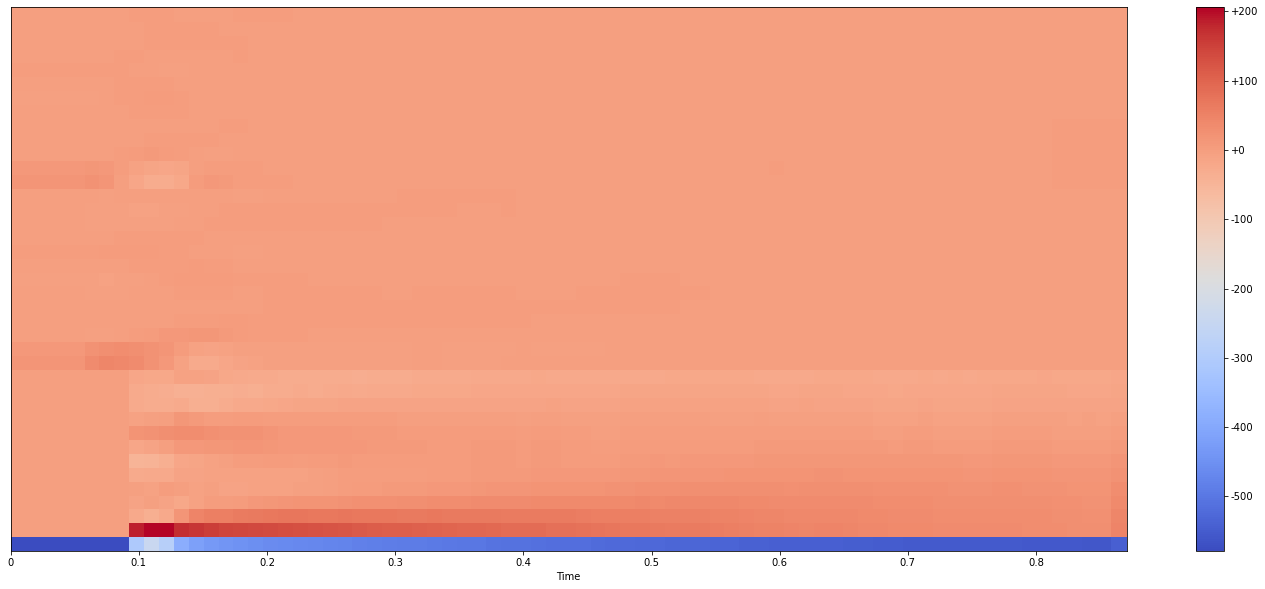

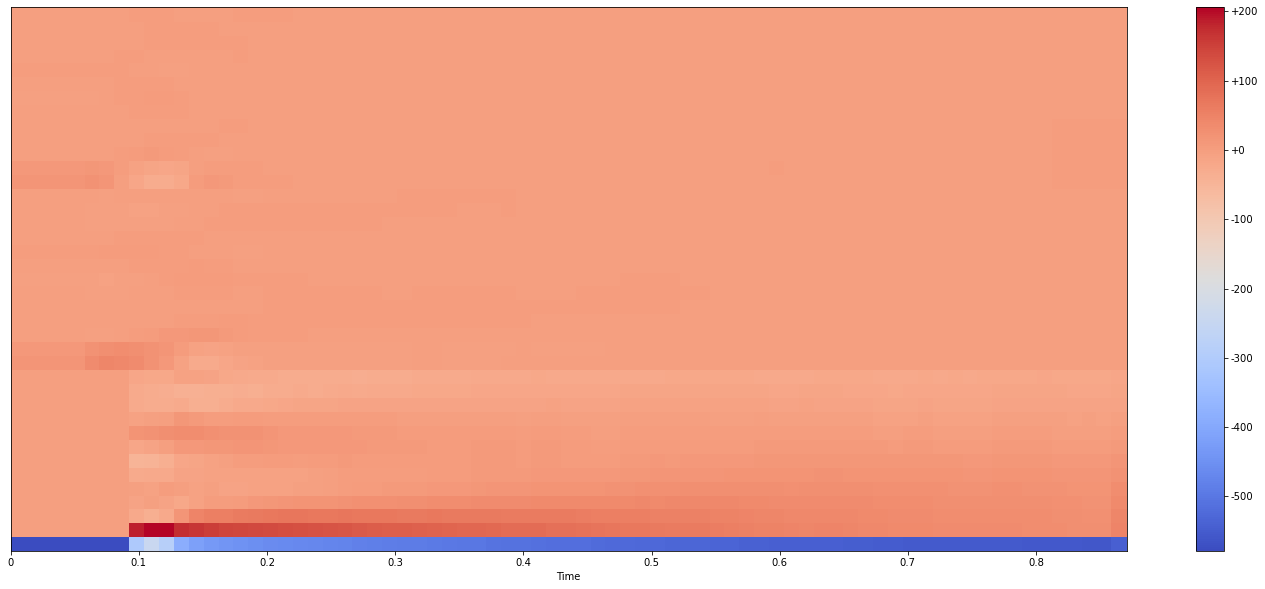

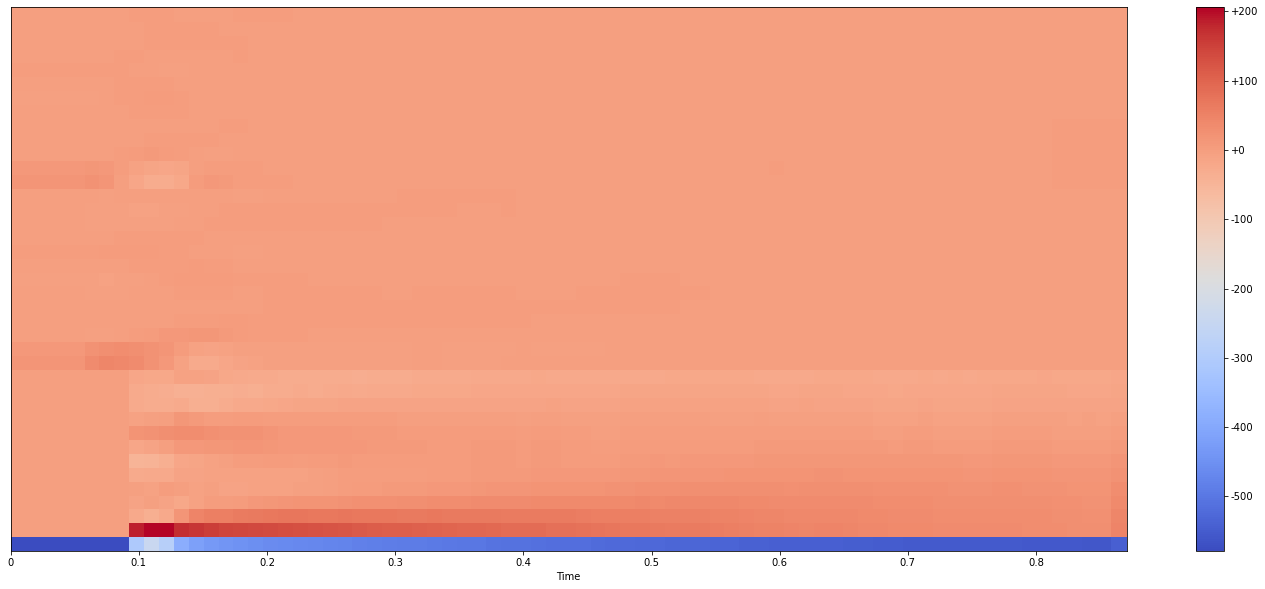

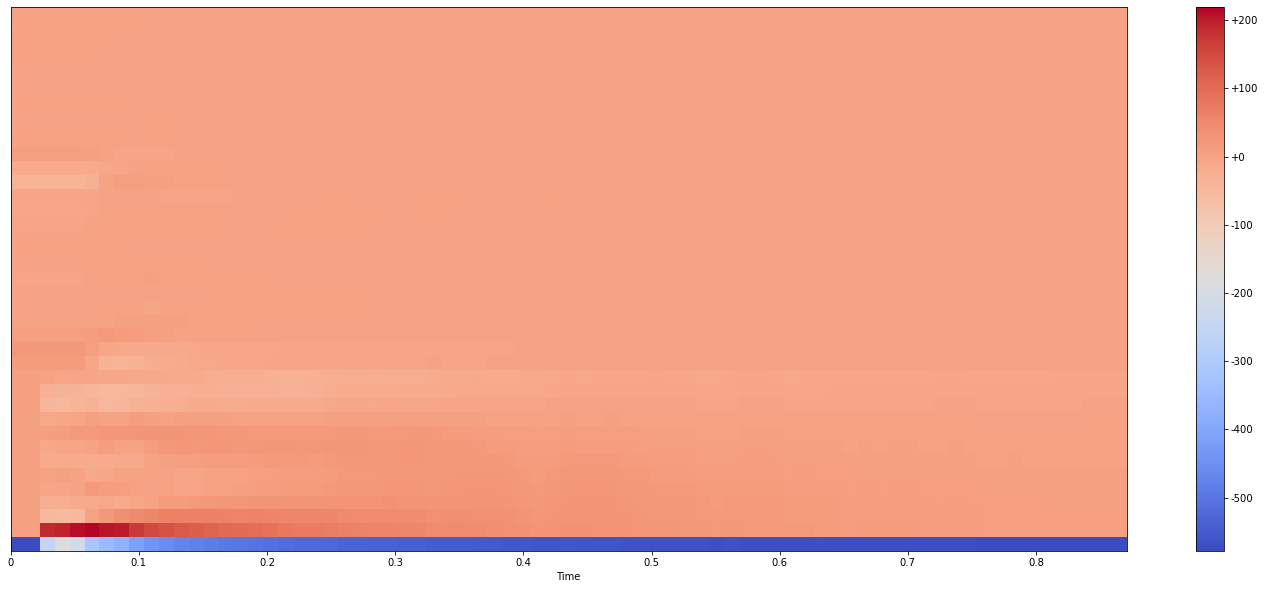

In [402]:
yarn_comprehensive = comprehensive_mfcc(yarn_mfcc, yarn_delta_mfcc, yarn_delta2_mfcc)
rubber_comprehensive = comprehensive_mfcc(rubber_mfcc, rubber_delta_mfcc, rubber_delta2_mfcc)
cord_comprehensive = comprehensive_mfcc(cord_mfcc, cord_delta_mfcc, cord_delta2_mfcc)
dead_comprehensive = comprehensive_mfcc(dead_mfcc, dead_delta_mfcc, dead_delta2_mfcc)

Another thing we can do in the frequency domain is to calculate the band energy ratio.

In [417]:
# Calculate band energy ratio

def calculate_split_frequency_bin(spectrogram, split_frequency, sample_rate):
    frequency_range = sample_rate/2
    frequency_delta_per_bin = frequency_range/spectrogram.shape[0]
    split_frequency_bin = np.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [418]:
yarn_spec = librosa.stft(yarn_c4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
rubber_spec = librosa.stft(rubber_c4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
cord_spec = librosa.stft(cord_c4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
dead_spec = librosa.stft(dead_c4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [421]:
split_frequency_bin = calculate_split_frequency_bin(yarn_spec, 2000, 44100)
split_frequency_bin

92

In [440]:
def calculate_band_energy_ratio(spectrogram, split_frequency, sample_rate):
    split_frequency_bin = calculate_split_frequency_bin(yarn_spec, 2000, 44100)
    
    # move to the power spectrum
    power_spec = np.abs(spectrogram)**2
    power_spec = power_spec.T
    
    band_energy_ratio = []
    
    for i in power_spec:
        sum_power_low_frequencies = np.sum(i[:split_frequency_bin])
        sum_power_high_frequencies = np.sum(i[split_frequency_bin:])
        ber_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(ber_current_frame)
        
    return np.array(band_energy_ratio)

In [441]:
ber_yarn = calculate_band_energy_ratio(yarn_spec, 2000, 44100)
ber_rubber = calculate_band_energy_ratio(rubber_spec, 2000, 44100)
ber_cord = calculate_band_energy_ratio(cord_spec, 2000, 44100)
ber_dead = calculate_band_energy_ratio(dead_spec, 2000, 44100)

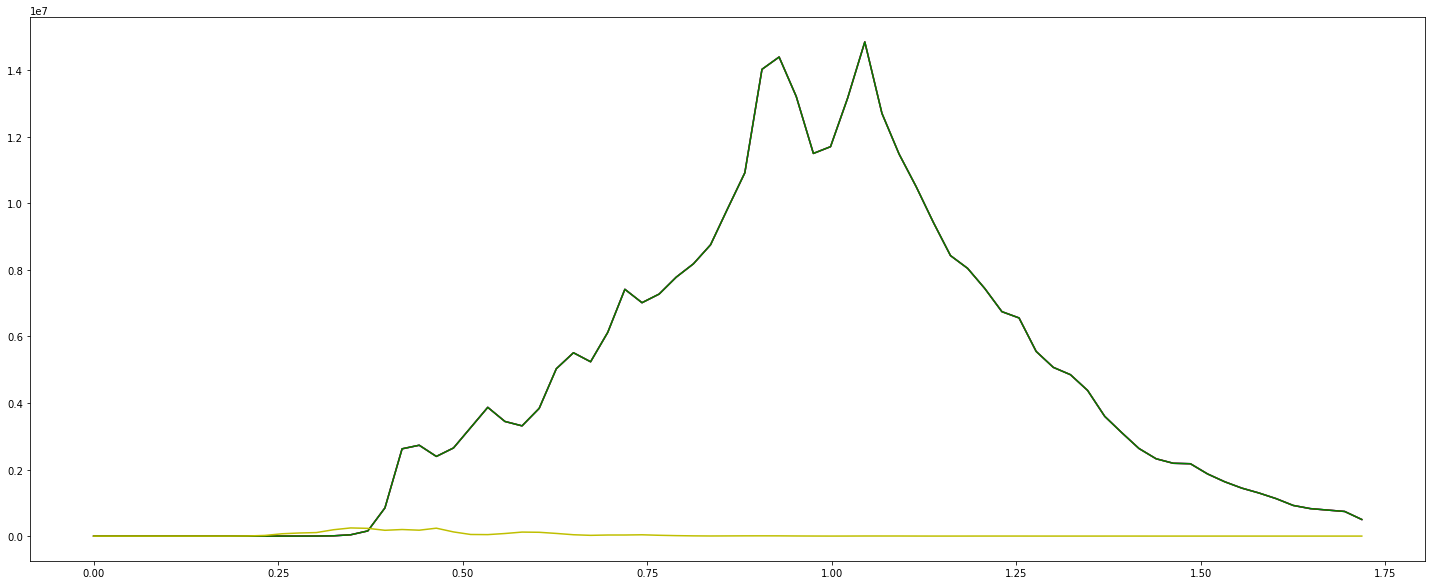

In [443]:
frames = range(len(ber_yarn))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

plt.figure(figsize=(25,10))
plt.plot(t, ber_yarn, color ='b')
plt.plot(t, ber_rubber, color ='r')
plt.plot(t, ber_cord, color = 'g')
plt.plot(t, ber_dead, color = 'y')
plt.show()

Another option is to calculate the spectral centroid

In [459]:
# Spectral centroid with librosa

sc_yarn = librosa.feature.spectral_centroid(y = yarn_c4, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_rubber = librosa.feature.spectral_centroid(y = rubber_c4, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_cord = librosa.feature.spectral_centroid(y = cord_c4, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sc_dead = librosa.feature.spectral_centroid(y = dead_c4, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]

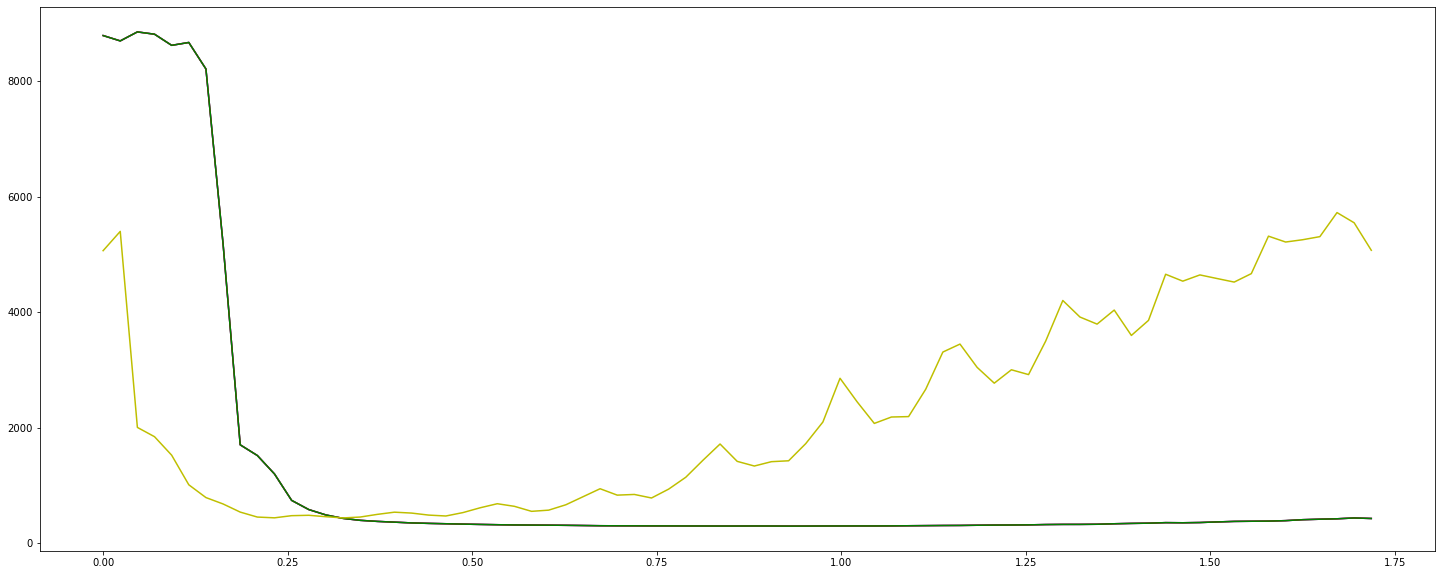

In [462]:
# Visualize spectral sentroid

plt.figure(figsize=(25,10))
plt.plot(t, sc_yarn, color='b')
plt.plot(t, sc_rubber, color='r')
plt.plot(t, sc_cord, color = 'g')
plt.plot(t, sc_dead, color = 'y')
plt.show()

Another option is to calculate the bandwidth.  

In [463]:
# Calculate bandwidth

sb_yarn = librosa.feature.spectral_bandwidth(y = yarn_c4, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sb_rubber = librosa.feature.spectral_bandwidth(y = rubber_c4, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sb_cord = librosa.feature.spectral_bandwidth(y = cord_c4, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
sb_dead = librosa.feature.spectral_bandwidth(y = dead_c4, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]

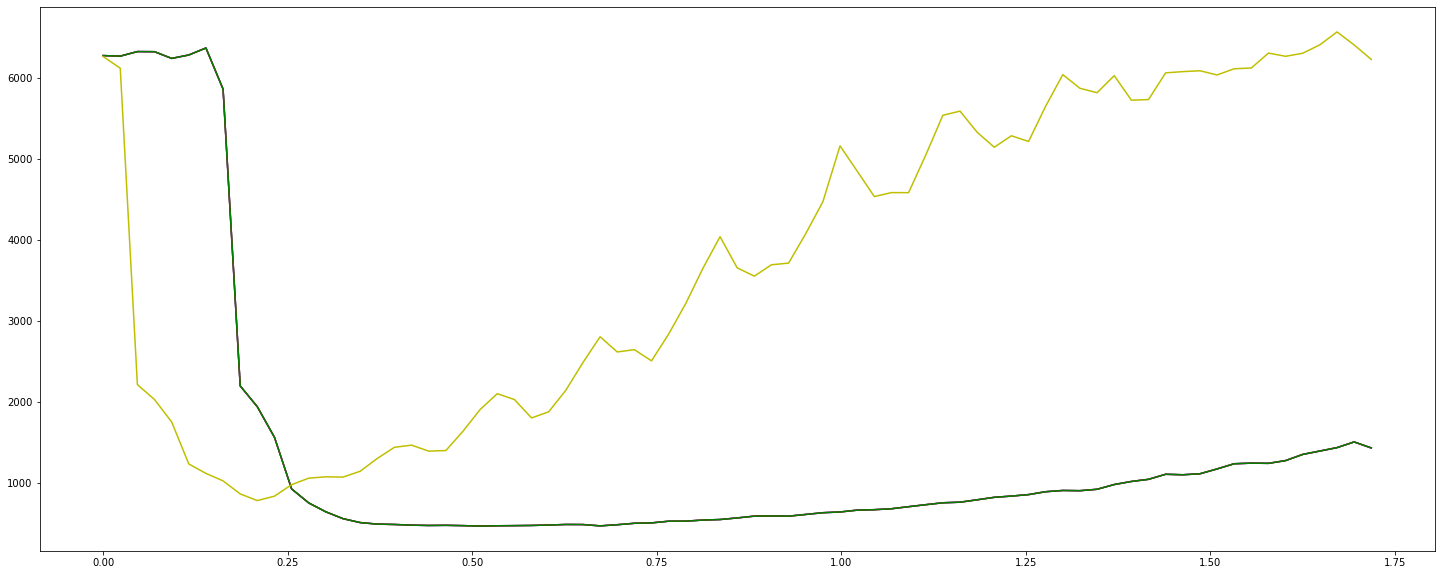

In [464]:
# Visualize spectral bandwidth

plt.figure(figsize=(25,10))
plt.plot(t, sb_yarn, color='b')
plt.plot(x, sb_rubber, color='r')
plt.plot(x1, sb_cord, color = 'g')
plt.plot(x2, sb_dead, color = 'y')
plt.show()

Based on all these visuallizations it does not seem like there is much difference between the waveformas based on the mallet used to strike the marimba.  So years and years of percussionsists spending hundreds of dollars on various mallets really has no effect on sound.  Percussionists showing up to performances with gig bags full of different types of marimba mallets, and time spent agonizing over the perfect mallet for each peice of music played, really has no impact on the actual sound quality of the instrument.  Could this really be true?  Perhaps the type of mallet is more specific to the feel for the player.  Perhaps the different types of mallets provide the player a different amount of rebound or flexability in playing which could be warranted for picking one mallet over the other.  In this analysis the amplitude was normalized, perhaps the different type of mallet can more easilly produce different amplitudes from the instrument.  It is also possible that we can run this all through computer learning algorythm and the computer can find something that we cannot.    